In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load merged data
merged = pd.read_csv(r"soil_moisture_merged.csv")

print(f"Shape of merged dataset: {merged.shape}")
merged.head()

Shape of merged dataset: (2643, 18)


,AEZ_NAME,week_start,sm_surface,VV,VH,NDVI,LST,Rainfall_7d,Rainfall_7d_lag,ET,LAI,NDWI,NDMI,Temp_7d,Temp_7d_lagged,landcover,elevation,slope
0,Active Tista Floodplain,2022-01-01,0.159142,-5.761691,-13.478774,0.5488,22.31,3.705716,2.430984,8.2,0.6,0.041381,0.261766,17.507983,17.870370,40,33,1.386612
1,Tista Meander Floodplain,2022-01-01,0.152997,-7.386647,-16.112829,0.4492,23.41,4.648317,0.000000,7.5,0.6,-0.025512,0.127510,17.625635,17.970898,40,30,2.963912
2,Karatoya-Bangali Floodplain,2022-01-01,0.101049,-9.252055,-16.693300,0.4091,23.61,0.000000,0.000000,10.5,0.6,0.064735,0.241161,17.894887,18.837795,10,17,0.927410
3,Lower Atrai Basin,2022-01-01,0.107364,-9.480288,-18.177580,0.2117,23.75,6.558670,0.000000,10.5,0.2,0.022280,0.228830,17.792813,18.636809,40,13,1.378362
4,Active Brahmaputra-Jamuna Floodplain,2022-01-01,0.100783,-8.074512,-16.009851,0.4884,23.81,4.167820,2.591343,8.0,0.6,0.108474,0.320618,18.043685,18.809614,40,18,2.044861


#### Pearson

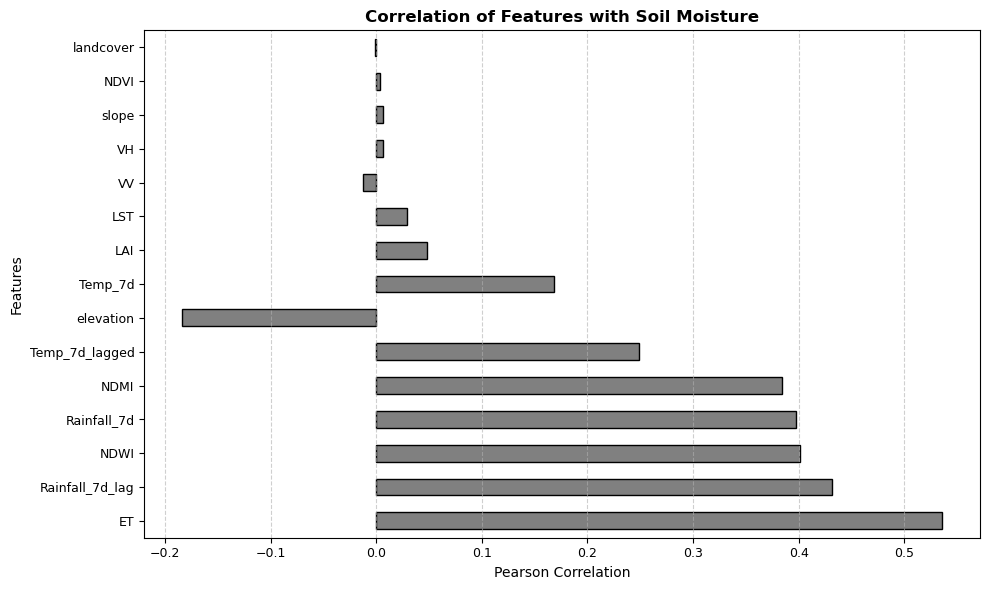

In [ ]:
#correlation with soil_moisture
soil_moisture_corr = merged.corr(numeric_only=True)['sm_surface'].drop('sm_surface')

soil_moisture_corr_sorted = soil_moisture_corr.reindex(soil_moisture_corr.abs().sort_values(ascending=False).index)

# Plot 
plt.figure(figsize=(10,6))
ax = soil_moisture_corr_sorted.plot(kind='barh', color='gray', edgecolor='black')

# title, grids and labels
plt.title("Correlation of Features with Soil Moisture", fontsize=12, fontweight='bold')
plt.xlabel("Pearson Correlation", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()


plt.savefig('01.Correlation_with_soil_moisture.png', dpi=600)

# Display the plot
plt.show()

In [11]:
print(soil_moisture_corr_sorted)

ET                 0.535793
Rainfall_7d_lag    0.432053
NDWI               0.401557
Rainfall_7d        0.397337
NDMI               0.384348
Temp_7d_lagged     0.248557
elevation         -0.183932
Temp_7d            0.168513
LAI                0.047937
LST                0.029226
VV                -0.012659
VH                 0.006384
slope              0.006279
NDVI               0.003668
landcover         -0.001552
Name: sm_surface, dtype: float64


### Linear Regression with top 5 features from Pearson

In [14]:
features_lr = [
    "ET", 
    "Rainfall_7d_lag", 
    "NDWI", 
    "Rainfall_7d", 
    "NDMI"
]

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop rows with missing target
merged_clean = merged.dropna(subset=['sm_surface'])

# Define X and y 
X_lr = merged_clean[features_lr]
y_lr = merged_clean['sm_surface']

# 80/20 split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42, shuffle=True
)

# scale features
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_lr_scaled, y_train_lr)

# predictions
y_pred_lr = model_lr.predict(X_test_lr_scaled)

# evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.3f}")
print(f"Linear Regression MAE: {mae_lr:.3f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression RMSE: 0.085
Linear Regression MAE: 0.066
Linear Regression R²: 0.37
